# Cloud Computing Project


Student name: Xuhua Sun (xsun57@jhu.edu)

Student name: Shun Yang (syang149@jhu.edu)

Student name: Chenyu Zhang (czhan146@jhu.edu)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Data

The data set contains 43 features per record, with 41 of the features referring to the traffic input itself and the last two are labels (whether it is a normal or attack) and Score (the severity of the traffic input itself).

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

file_path_train = 'C:/Users/Dell/OneDrive - Johns Hopkins/601.619 Cloud Computing/project/NSL-KDD/KDDTrain+.txt' #NSL-KDD train dataset
file_path_test = 'C:/Users/Dell/OneDrive - Johns Hopkins/601.619 Cloud Computing/project/NSL-KDD/KDDTest+.txt'  #NSL-KDD' test dataset

#file_path_train = '/content/drive/MyDrive/Dataset/KDDTrain+.txt' #NSL-KDD train dataset
#file_path_test = '/content/drive/MyDrive/Dataset/KDDTest+.txt'  #NSL-KDD' test dataset

columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])
df_train = pd.read_csv(file_path_train, names=columns)
df_test = pd.read_csv(file_path_test, names=columns)

df_train


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [2]:
df_test.columns = columns
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


# Statistics

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [4]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [5]:
df_train['attack'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

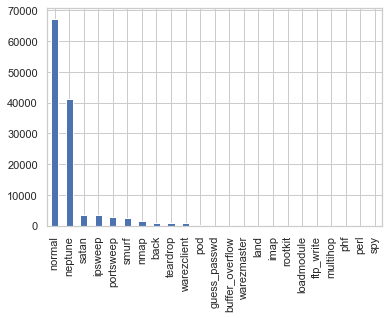

In [6]:
def bar_graph(columns):
    df_train[columns].value_counts().plot(kind="bar")
bar_graph('attack')

Within the data set exists 4 different classes of attacks:

1.   Denial of Service (DoS)
2.   Probe
3.   User to Root(U2R)
4.   Remote to Local (R2L)

It is noticed from the descriptions above that DoS acts differently from the other three attacks, where DoS attempts to shut down a system to stop traffic flow altogether, whereas the other three attempts to quietly infiltrate the system undetected.

In [7]:
# changing attack labels to their respective attack class
def change_attack(df):
    df.attack.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.attack.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
    df.attack.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.attack.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [8]:
change_attack(df_train)
change_attack(df_test)

In [9]:
df_train.attack.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: attack, dtype: int64

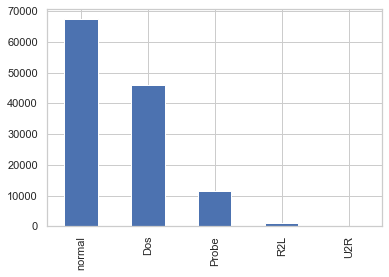

In [10]:
bar_graph('attack')

# DoS Dataset

In [11]:
df_dos_train = df_train.loc[df_train['attack'].isin(['Dos','normal'])]
df_dos_test = df_test.loc[df_test['attack'].isin(['Dos','normal'])]

In [12]:
df_dos_test.attack.value_counts()

normal    9711
Dos       7460
Name: attack, dtype: int64

In [13]:
df_dos_train.attack.value_counts()

normal    67343
Dos       45927
Name: attack, dtype: int64

In [14]:
df_dos_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,20


In [15]:
df_train.protocol_type.value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [16]:
labels = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'attack', 'difficulty_level']
combined_data = pd.concat([df_dos_train, df_dos_test])
print(combined_data.shape)
#combined_data.head(5)
#combined_data
df_dos_train

(130441, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos,20


In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
combined_data['attack'] = le.fit_transform(combined_data['attack'])
combined_data['protocol_type'] = le.fit_transform(combined_data['protocol_type'])
combined_data['service'] = le.fit_transform(combined_data['service'])
combined_data['flag'] = le.fit_transform(combined_data['flag'])

combined_data = combined_data.drop('level', 1)
combined_data

C:\Users\Dell\AppData\Local\Temp\ipykernel_10360\3419487038.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  combined_data = combined_data.drop('level', 1)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,40,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,44,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,0,14,9,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0
22539,0,1,49,9,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,1
22540,0,1,22,9,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,1
22541,0,1,22,9,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,0


In [18]:
le = preprocessing.LabelEncoder()
df_dos_train['attack'] = le.fit_transform(df_dos_train['attack'])
df_dos_train['protocol_type'] = le.fit_transform(df_dos_train['protocol_type'])
df_dos_train['service'] = le.fit_transform(df_dos_train['service'])
df_dos_train['flag'] = le.fit_transform(df_dos_train['flag'])
df_dos_train = df_dos_train.drop('level', 1)
df_dos_train


C:\Users\Dell\AppData\Local\Temp\ipykernel_10360\2044253533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dos_train['attack'] = le.fit_transform(df_dos_train['attack'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_10360\2044253533.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dos_train['protocol_type'] = le.fit_transform(df_dos_train['protocol_type'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_10360\2044253533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,1,19,8,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,40,8,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,44,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,8,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,8,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,44,4,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
125969,8,2,44,8,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
125970,0,1,49,8,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
125971,0,1,26,4,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


In [19]:
le = preprocessing.LabelEncoder()
df_dos_test['attack'] = le.fit_transform(df_dos_test['attack'])
df_dos_test['protocol_type'] = le.fit_transform(df_dos_test['protocol_type'])
df_dos_test['service'] = le.fit_transform(df_dos_test['service'])
df_dos_test['flag'] = le.fit_transform(df_dos_test['flag'])
df_dos_test = df_dos_test.drop('level', 1)
df_dos_test


C:\Users\Dell\AppData\Local\Temp\ipykernel_10360\3244224203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dos_test['attack'] = le.fit_transform(df_dos_test['attack'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_10360\3244224203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dos_test['protocol_type'] = le.fit_transform(df_dos_test['protocol_type'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_10360\3244224203.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,1,44,0,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
1,0,1,44,0,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
2,2,1,19,8,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1
5,0,1,22,8,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,1
6,0,1,48,8,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,0,14,8,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.00,0
22539,0,1,48,8,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,1
22540,0,1,22,8,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,1
22541,0,1,22,8,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,0


In [20]:
data_x = combined_data.drop('attack', axis=1)
data_y = combined_data.loc[:,['attack']]
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=.2, random_state=42)

In [21]:
df_dos_train_x = df_dos_train.drop('attack', axis=1)
df_dos_train_y = df_dos_train.loc[:,['attack']]
df_dos_test_x = df_dos_test.drop('attack', axis=1)
df_dos_test_y = df_dos_test.loc[:,['attack']]

# Featrue Selection

#### Chi Square Selection


In [22]:
# Fisher Score (chi-square) 

In [23]:
from sklearn.feature_selection import SelectKBest, chi2

In [24]:
chi2_selector = SelectKBest(chi2, k=15)
X_kbest = chi2_selector.fit_transform(data_x, data_y)

In [25]:
# View results
print('Original number of features:', data_x.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 41
Reduced number of features: 15


In [26]:
# from numpy import array 
 
filter = chi2_selector.get_support()
features = np.array(data_x.columns)
print("All features:")
print(features)
 
print("Selected best 15:")
print(features[filter])
result_1 = features[filter]

All features:
['duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
 'land' 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
 'num_compromised' 'root_shell' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'num_outbound_cmds'
 'is_host_login' 'is_guest_login' 'count' 'srv_count' 'serror_rate'
 'srv_serror_rate' 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate'
 'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
 'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate']
Selected best 15:
['duration' 'service' 'flag' 'src_bytes' 'dst_bytes' 'logged_in'
 'num_root' 'count' 'serror_rate' 'srv_serror_rate' 'same_srv_rate'
 'dst_host_count' 'dst_host_srv_count' 'dst_host_serror_rate'
 'dst_host_srv_serror_rate']


#### Mutual Information Selection

In [27]:
# Information Gain

In [28]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(data_x, np.ravel(data_y))
mutual_info

array([3.13103455e-02, 5.66998276e-02, 4.48627802e-01, 4.49686820e-01,
       5.72186476e-01, 4.35332207e-01, 1.96140916e-03, 6.15881259e-03,
       0.00000000e+00, 9.55055773e-03, 0.00000000e+00, 2.71035825e-01,
       8.02387139e-03, 4.90962116e-04, 0.00000000e+00, 2.75591957e-03,
       1.55129348e-03, 1.46330138e-03, 3.26121586e-03, 0.00000000e+00,
       1.26865851e-03, 5.03240422e-03, 3.58526779e-01, 9.66295139e-02,
       3.25161369e-01, 3.23560704e-01, 3.58265333e-02, 3.66712931e-02,
       4.39122594e-01, 4.52332603e-01, 1.13073395e-01, 1.75836249e-01,
       3.24863518e-01, 3.48589373e-01, 3.46021979e-01, 1.48559175e-01,
       1.78238710e-01, 3.29460991e-01, 3.34047370e-01, 4.15890791e-02,
       5.45261456e-02])

In [29]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = data_x.columns
mutual_info.sort_values(ascending=False)

src_bytes                      0.572186
diff_srv_rate                  0.452333
flag                           0.449687
service                        0.448628
same_srv_rate                  0.439123
dst_bytes                      0.435332
count                          0.358527
dst_host_same_srv_rate         0.348589
dst_host_diff_srv_rate         0.346022
dst_host_srv_serror_rate       0.334047
dst_host_serror_rate           0.329461
serror_rate                    0.325161
dst_host_srv_count             0.324864
srv_serror_rate                0.323561
logged_in                      0.271036
dst_host_srv_diff_host_rate    0.178239
dst_host_count                 0.175836
dst_host_same_src_port_rate    0.148559
srv_diff_host_rate             0.113073
srv_count                      0.096630
protocol_type                  0.056700
dst_host_srv_rerror_rate       0.054526
dst_host_rerror_rate           0.041589
srv_rerror_rate                0.036671
rerror_rate                    0.035827


<AxesSubplot:>

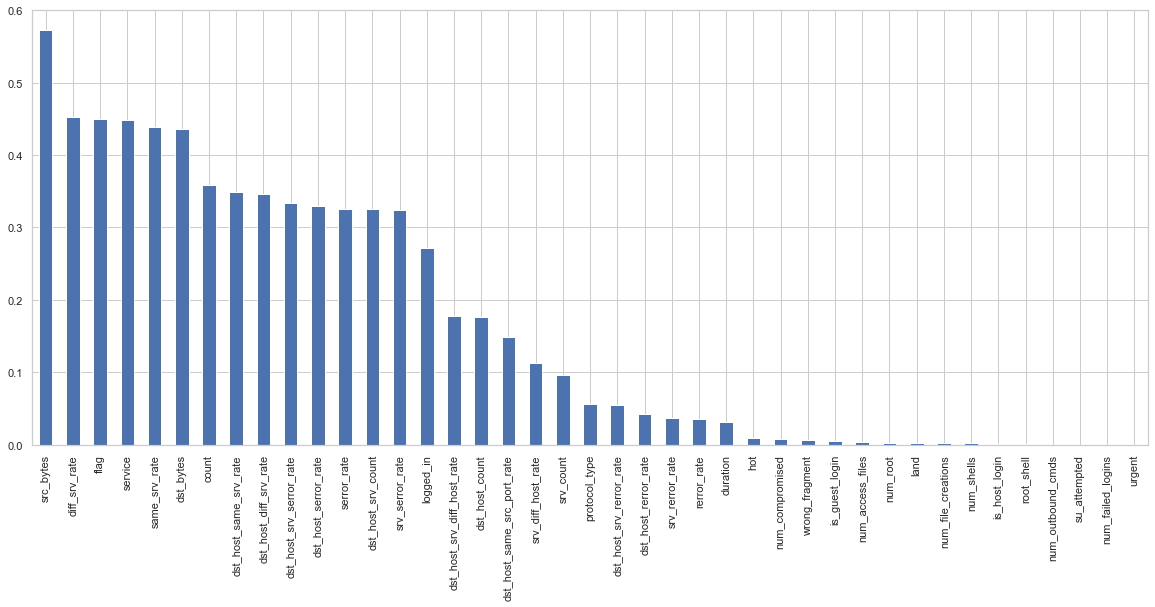

In [30]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [31]:
info_selector = SelectKBest(mutual_info_classif, k=15)
X_kbest = info_selector.fit_transform(data_x, np.ravel(data_y))
# View results
print('Original number of features:', data_x.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 41
Reduced number of features: 15


In [32]:
filter = info_selector.get_support()
features = np.array(data_x.columns)
print("All features:")
print(features)
 
print("Selected best 15:")
print(features[filter])
result_2 = features[filter]

All features:
['duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
 'land' 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
 'num_compromised' 'root_shell' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'num_outbound_cmds'
 'is_host_login' 'is_guest_login' 'count' 'srv_count' 'serror_rate'
 'srv_serror_rate' 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate'
 'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
 'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate']
Selected best 15:
['service' 'flag' 'src_bytes' 'dst_bytes' 'logged_in' 'count'
 'serror_rate' 'srv_serror_rate' 'same_srv_rate' 'diff_srv_rate'
 'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate']


#### Tree Selection


In [33]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(data_x, np.ravel(data_y))

ExtraTreesClassifier()

In [34]:
print(model.feature_importances_)

[3.18641488e-03 3.23189999e-02 1.52069110e-02 7.26472567e-02
 1.68823773e-02 3.48937852e-03 7.78141184e-05 1.81810894e-02
 6.49287919e-07 6.82549725e-03 8.50363319e-06 4.19634652e-02
 8.77976294e-03 6.66199210e-05 3.37595761e-05 2.04466234e-05
 6.30615172e-05 1.79404319e-07 4.10301198e-05 0.00000000e+00
 0.00000000e+00 3.16082724e-04 5.03341744e-02 1.63858218e-02
 1.03682398e-01 7.46853864e-02 3.49157070e-02 3.24439866e-02
 9.17823865e-02 4.96988723e-03 4.83174382e-03 2.29569694e-02
 4.24786985e-02 5.80078715e-02 5.38494144e-03 1.47012070e-02
 4.33468103e-03 1.02811012e-01 7.39517994e-02 2.82696844e-02
 1.29623432e-02]


In [35]:
ext=pd.DataFrame(model.feature_importances_,columns=["extratrees"])
ext
ext.sort_values(['extratrees'], ascending=True)

,extratrees
20,0.000000e+00
19,0.000000e+00
17,1.794043e-07
8,6.492879e-07
10,8.503633e-06
15,2.044662e-05
14,3.375958e-05
18,4.103012e-05
16,6.306152e-05
13,6.661992e-05


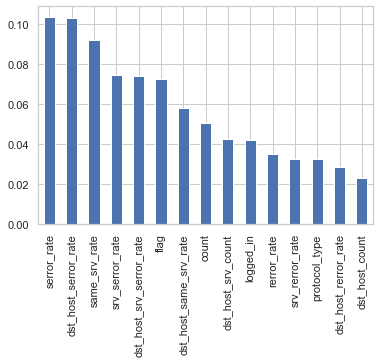

In [36]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data_x.columns)
feat_importances.nlargest(15).plot(kind='bar')
plt.show()

In [37]:
print('Original number of features:', data_x.shape[1])
print('Reduced number of features:', feat_importances.nlargest(15).shape[0])
result_3 = np.array(feat_importances.nlargest(15).index[:15])

Original number of features: 41
Reduced number of features: 15


#### XGBoost Selection

In [38]:
import xgboost
import matplotlib.pyplot as plt

model = xgboost.XGBClassifier()
model.fit(data_x,data_y)
print(model.feature_importances_) 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[11:42:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1.3470085e-03 9.6420065e-02 2.3040224e-03 6.6631281e-01 4.4391956e-02
 2.2143328e-03 5.3410832e-04 3.2166455e-02 0.0000000e+00 8.5089639e-05
 0.0000000e+00 2.7265464e-04 9.5086105e-02 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 2.2746677e-02 2.0083667e-04 3.7362704e-03
 3.8482137e-03 1.4808640e-04 3.7611765e-04 2.2074670e-04 1.3848053e-03
 1.1157502e-04 1.3088310e-03 1.3561970e-04 2.9294153e-03 3.7754553e-03
 6.1369396e-04 4.5641656e-03 7.0676557e-04 3.9883326e-03 7.2534899e-03
 8.1630261e-04]


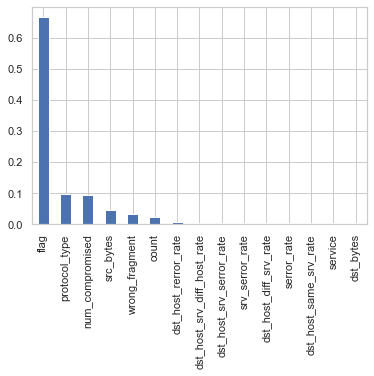

In [39]:
feat_imp = pd.Series(model.feature_importances_, index=data_x.columns)
feat_imp.nlargest(15).plot(kind='bar')
result_4 = np.array(feat_imp.nlargest(15).index[:15])
plt.show()

#### Embedded (Logistic Regression) Selection

In [40]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

LR_selector = SelectFromModel(LogisticRegression(penalty="l2", C=1.0), threshold=-np.inf, max_features=15)
x_kbest = LR_selector.fit_transform(data_x, data_y)
# print(x_kbest)

# View results
print('Original number of features:', data_x.shape[1])
print('Reduced number of features:', x_kbest.shape[1])

C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Original number of features: 41
Reduced number of features: 15


C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
filter = LR_selector.get_support()
features = np.array(data_x.columns)
print("All features:")
print(features)
 
print("Selected best 15:")
print(features[filter])
result_5 = features[filter]

All features:
['duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
 'land' 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
 'num_compromised' 'root_shell' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'num_outbound_cmds'
 'is_host_login' 'is_guest_login' 'count' 'srv_count' 'serror_rate'
 'srv_serror_rate' 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate'
 'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
 'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate']
Selected best 15:
['protocol_type' 'service' 'flag' 'hot' 'logged_in' 'num_root' 'count'
 'srv_count' 'serror_rate' 'srv_serror_rate' 'same_srv_rate'
 'dst_host_count' 'dst_host_srv_count' 'dst_host_serror_rate'
 'dst_host_srv_serror_rate']


#### Pearson Selection

In [42]:
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest
# np.random.seed(0)
# size = 300
# x = np.random.normal(0, 1, size)
# print("Lower noise：", pearsonr(x, x + np.random.normal(0, 1, size)))
# print("Higher noise：", pearsonr(x, x + np.random.normal(0, 10, size)))

In [43]:
def score_func(X, Y):
    res_tup = []
    for i in range(X.shape[1]):
        xi, y = pearsonr(X[:, i], Y)
        res_tup.append([xi, y])
    res_tup = np.array(res_tup).reshape(-1, 2)
    return res_tup[:, 0], res_tup[:, 1]


pearson_selector = SelectKBest(lambda X, Y: score_func(X, Y), k=15)
x_kbest = pearson_selector.fit_transform(data_x, np.array(data_y).flatten())
print(x_kbest)

# View results
print('Original number of features:', data_x.shape[1])
print('Reduced number of features:', x_kbest.shape[1])

[[0.   1.   9.   ... 0.17 0.17 0.  ]
 [0.   2.   9.   ... 0.   0.88 0.  ]
 [0.   1.   5.   ... 0.1  0.   0.  ]
 ...
 [0.   1.   9.   ... 1.   0.01 0.01]
 [0.   1.   9.   ... 1.   0.   0.  ]
 [0.   2.   9.   ... 0.99 0.   0.  ]]
Original number of features: 41
Reduced number of features: 15


C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [44]:
filter = pearson_selector.get_support()
features = np.array(data_x.columns)
print("All features:")
print(features)
 
print("Selected best 15:")
print(features[filter])
result_6 = features[filter]

All features:
['duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
 'land' 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
 'num_compromised' 'root_shell' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'num_outbound_cmds'
 'is_host_login' 'is_guest_login' 'count' 'srv_count' 'serror_rate'
 'srv_serror_rate' 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate'
 'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
 'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate']
Selected best 15:
['duration' 'protocol_type' 'flag' 'dst_bytes' 'hot' 'logged_in'
 'root_shell' 'num_access_files' 'is_guest_login' 'same_srv_rate'
 'srv_diff_host_rate' 'dst_host_srv_count' 'dst_host_same_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate']


### Combine the results from six feature selectors

In [45]:

original_features = np.array(data_x.columns)
print("Original Features: \n", original_features)
print("Result_1: \n", result_1)
print("Result_2: \n", result_2)
print("Result_3: \n", result_3)
print("Result_4: \n", result_4)
print("Result_5: \n", result_5)
print("Result_6: \n", result_6)

result = []
result.append(result_1)
result.append(result_2)
result.append(result_3)
result.append(result_4)
result.append(result_5)
result.append(result_6)

Original Features: 
 ['duration' 'protocol_type' 'service' 'flag' 'src_bytes' 'dst_bytes'
 'land' 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
 'num_compromised' 'root_shell' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'num_outbound_cmds'
 'is_host_login' 'is_guest_login' 'count' 'srv_count' 'serror_rate'
 'srv_serror_rate' 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate'
 'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
 'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate']
Result_1: 
 ['duration' 'service' 'flag' 'src_bytes' 'dst_bytes' 'logged_in'
 'num_root' 'count' 'serror_rate' 'srv_serror_rate' 'same_srv_rate'
 'dst_host_count' 'dst_host_srv_count' 'dst_host_serror_rate'
 'dst_host_srv_serror_rate']
Result_2: 
 ['service' 'flag' 'src_bytes' 'd

In [46]:
rank_table = [0] * 41
for j in range(6):
    for i in range(original_features.shape[0]):
        if original_features[i] in result[j]:
            rank=15-np.where(result[j] == original_features[i])[0][0]
            rank_table[i]+=rank
        else:
            rank_table[i]+=0
print(rank_table)
print(sorted(rank_table)[::-1])

[30, 46, 45, 78, 37, 36, 0, 11, 0, 23, 0, 48, 13, 9, 0, 19, 0, 0, 8, 0, 0, 7, 45, 8, 42, 38, 5, 4, 36, 6, 5, 9, 22, 19, 8, 2, 9, 20, 21, 11, 0]
[78, 48, 46, 45, 45, 42, 38, 37, 36, 36, 30, 23, 22, 21, 20, 19, 19, 13, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 5, 5, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [47]:
index_rank = np.argsort(rank_table)[::-1]
print(index_rank)

[ 3 11  1  2 22 24 25  4 28  5  0  9 32 38 37 33 15 12  7 39 13 31 36 18
 23 34 21 29 30 26 27 35  6 40  8 10 14 16 17 19 20]


In [48]:
top14_features = []
for index in index_rank:
    top14_features.append(original_features[index])
    if len(top14_features) == 14:
        break
print(top14_features)

['flag', 'logged_in', 'protocol_type', 'service', 'count', 'serror_rate', 'srv_serror_rate', 'src_bytes', 'same_srv_rate', 'dst_bytes', 'duration', 'hot', 'dst_host_srv_count', 'dst_host_srv_serror_rate']


In [49]:
data_x = pd.DataFrame(data_x, columns = original_features)
data_x = data_x[data_x.columns.intersection(top14_features)]

In [50]:
#df_dos_train = pd.DataFrame(df_dos_train, columns = original_features)
df_dos_train_x = df_dos_train_x[df_dos_train_x.columns.intersection(top14_features)]

# df_dos_test = pd.DataFrame(df_dos_test, columns = original_features)
df_dos_test_x = df_dos_test_x[df_dos_test_x.columns.intersection(top14_features)]

In [51]:
df_dos_train_x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,hot,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_srv_serror_rate
0,0,1,19,8,491,0,0,0,2,0.0,0.0,1.00,25,0.00
1,0,2,40,8,146,0,0,0,13,0.0,0.0,0.08,1,0.00
2,0,1,44,4,0,0,0,0,123,1.0,1.0,0.05,26,1.00
3,0,1,22,8,232,8153,0,1,5,0.2,0.2,1.00,255,0.01
4,0,1,22,8,199,420,0,1,30,0.0,0.0,1.00,255,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,44,4,0,0,0,0,184,1.0,1.0,0.14,25,1.00
125969,8,2,44,8,105,145,0,0,2,0.0,0.0,1.00,244,0.00
125970,0,1,49,8,2231,384,0,1,1,0.0,0.0,1.00,30,0.00
125971,0,1,26,4,0,0,0,0,144,1.0,1.0,0.06,8,1.00


In [52]:
df_dos_test_x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,hot,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_srv_serror_rate
0,0,1,44,0,0,0,0,0,229,0.0,0.0,0.04,10,0.0
1,0,1,44,0,0,0,0,0,136,0.0,0.0,0.01,1,0.0
2,2,1,19,8,12983,0,0,0,1,0.0,0.0,1.00,86,0.0
5,0,1,22,8,267,14515,0,1,4,0.0,0.0,1.00,255,0.0
6,0,1,48,8,1022,387,0,1,1,0.0,0.0,1.00,28,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,0,14,8,1032,0,0,0,53,0.0,0.0,1.00,255,0.0
22539,0,1,48,8,794,333,0,1,1,0.0,0.0,1.00,141,0.0
22540,0,1,22,8,317,938,0,1,2,0.0,0.0,1.00,255,0.0
22541,0,1,22,8,54540,8314,2,1,5,0.0,0.0,1.00,255,0.0


In [53]:
data_x

,duration,protocol_type,service,flag,src_bytes,dst_bytes,hot,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_srv_serror_rate
0,0,1,19,9,491,0,0,0,2,0.0,0.0,1.00,25,0.00
1,0,2,40,9,146,0,0,0,13,0.0,0.0,0.08,1,0.00
2,0,1,44,5,0,0,0,0,123,1.0,1.0,0.05,26,1.00
3,0,1,22,9,232,8153,0,1,5,0.2,0.2,1.00,255,0.01
4,0,1,22,9,199,420,0,1,30,0.0,0.0,1.00,255,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,0,14,9,1032,0,0,0,53,0.0,0.0,1.00,255,0.00
22539,0,1,49,9,794,333,0,1,1,0.0,0.0,1.00,141,0.00
22540,0,1,22,9,317,938,0,1,2,0.0,0.0,1.00,255,0.00
22541,0,1,22,9,54540,8314,2,1,5,0.0,0.0,1.00,255,0.00


In [54]:
data_y

,attack
0,1
1,1
2,0
3,1
4,1
...,...
22538,0
22539,1
22540,1
22541,0


In [55]:
data = data_x.copy()
data['attack'] = data_y['attack']
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,hot,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,dst_host_srv_count,dst_host_srv_serror_rate,attack
0,0,1,19,9,491,0,0,0,2,0.0,0.0,1.00,25,0.00,1
1,0,2,40,9,146,0,0,0,13,0.0,0.0,0.08,1,0.00,1
2,0,1,44,5,0,0,0,0,123,1.0,1.0,0.05,26,1.00,0
3,0,1,22,9,232,8153,0,1,5,0.2,0.2,1.00,255,0.01,1
4,0,1,22,9,199,420,0,1,30,0.0,0.0,1.00,255,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,0,14,9,1032,0,0,0,53,0.0,0.0,1.00,255,0.00,0
22539,0,1,49,9,794,333,0,1,1,0.0,0.0,1.00,141,0.00,1
22540,0,1,22,9,317,938,0,1,2,0.0,0.0,1.00,255,0.00,1
22541,0,1,22,9,54540,8314,2,1,5,0.0,0.0,1.00,255,0.00,0


# Model

## Model1

## Model1

In [56]:
from pycaret.datasets import get_data
from pycaret.classification import *
clf1 = setup(data = data, target = 'attack')

,Description,Value
0,session_id,6827
1,Target,attack
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(130441, 15)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [57]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9991,0.9999,0.9989,0.9996,0.9992,0.9981,0.9981,5.1630
lightgbm,Light Gradient Boosting Machine,0.9991,1.0000,0.9989,0.9995,0.9992,0.9981,0.9981,1.2190
rf,Random Forest Classifier,0.9990,0.9997,0.9990,0.9993,0.9992,0.9979,0.9979,2.4730
et,Extra Trees Classifier,0.9990,0.9994,0.9989,0.9995,0.9992,0.9980,0.9980,2.4150
dt,Decision Tree Classifier,0.9988,0.9989,0.9986,0.9993,0.9990,0.9975,0.9975,0.1690
gbc,Gradient Boosting Classifier,0.9983,0.9999,0.9980,0.9992,0.9986,0.9965,0.9965,5.5600
knn,K Neighbors Classifier,0.9970,0.9990,0.9960,0.9989,0.9975,0.9938,0.9938,5.0640
ada,Ada Boost Classifier,0.9923,0.9997,0.9950,0.9919,0.9935,0.9840,0.9840,1.7960
ridge,Ridge Classifier,0.9576,0.0000,0.9847,0.9456,0.9647,0.9115,0.9127,0.0860
lda,Linear Discriminant Analysis,0.9575,0.9775,0.9846,0.9456,0.9647,0.9114,0.9126,0.2030


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=6827, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
data_x = data.drop(columns=['attack'])
y = data['attack']
x = data_x.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train[0], y_train[0]

(array([  0.  ,   1.  ,  49.  ,   5.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         12.  ,   1.  ,   1.  ,   1.  , 144.  ,   0.64]),
 0)

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from itertools import chain 

EPOCHS = 10
BATCH_SIZE = 16
LEARNING_RATE = 0.0001

## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))

In [61]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE)

In [62]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        self.layer_1 = nn.Linear(14, 100) 
        self.layer_2 = nn.Linear(100, 500)
        self.layer_3 = nn.Linear(500,100) 
        self.layer_4 = nn.Linear(100, 50) 
        self.layer_out = nn.Linear(50, 1) 

        self.out_act = nn.Sigmoid()
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.dropout(x)
        x = self.layer_out(x)
        x = self.out_act(x)
        
        return x

In [63]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [64]:
model = binaryClassification()
model.to(device)
print(model)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

binaryClassification(
  (layer_1): Linear(in_features=14, out_features=100, bias=True)
  (layer_2): Linear(in_features=100, out_features=500, bias=True)
  (layer_3): Linear(in_features=500, out_features=100, bias=True)
  (layer_4): Linear(in_features=100, out_features=50, bias=True)
  (layer_out): Linear(in_features=50, out_features=1, bias=True)
  (out_act): Sigmoid()
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


In [65]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(y_pred)
    
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [66]:
model.train()
losslist = []
acclist = []
for e in range(0, EPOCHS):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)

        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
    
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    losslist.append(epoch_loss/len(train_loader))
    acclist.append(epoch_acc/len(train_loader))
    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 000: | Loss: 2.16242 | Acc: 92.197
Epoch 001: | Loss: 2.03404 | Acc: 94.073
Epoch 002: | Loss: 1.94738 | Acc: 93.933
Epoch 003: | Loss: 1.14671 | Acc: 94.066
Epoch 004: | Loss: 1.34951 | Acc: 94.553
Epoch 005: | Loss: 1.30173 | Acc: 95.512
Epoch 006: | Loss: 1.34887 | Acc: 95.502
Epoch 007: | Loss: 0.25676 | Acc: 96.004
Epoch 008: | Loss: 0.13151 | Acc: 96.083
Epoch 009: | Loss: 0.36451 | Acc: 96.215


In [67]:
from itertools import chain
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
# flatten 2d list to 1d list
y_pred_list =  list(chain.from_iterable(y_pred_list))  
y_pred_list = np.array(y_pred_list)

In [68]:
acc = (y_test == y_pred_list)
test_acc = acc.sum()/len(acc)
print("Test Acc : ",test_acc)

Test Acc :  0.9586415730767757


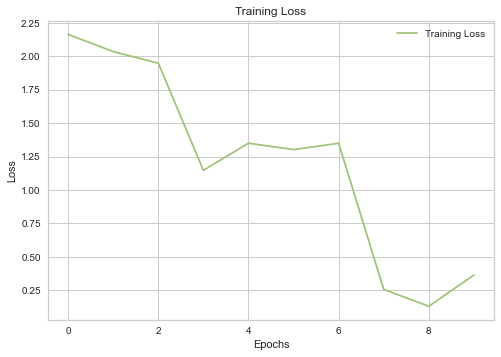

In [71]:
epochs=range(0,10)
plt.plot(epochs, losslist, 'g', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

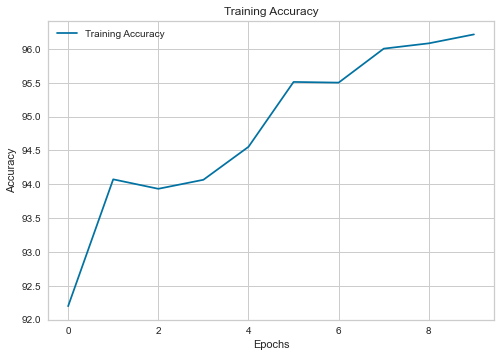

In [72]:
plt.plot(epochs, acclist, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
data_x = data.drop(columns=['attack'])
y = data['attack']
x = data_x.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train[0], y_train[0]

In [150]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
gnb = GaussianNB()
gnb.fit(df_dos_train_x,df_dos_train_y)
gnb_pred = gnb.predict(df_dos_test_x)
print("Accuracy : ",metrics.accuracy_score(df_dos_test_y,gnb_pred))


Accuracy :  0.5868615689243492


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [157]:
df_dos_test_y.shape

(17171, 1)

In [158]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print(classification_report(df_dos_test_y, gnb_pred))

              precision    recall  f1-score   support

           0       0.52      0.82      0.63      7460
           1       0.75      0.41      0.53      9711

    accuracy                           0.59     17171
   macro avg       0.63      0.61      0.58     17171
weighted avg       0.65      0.59      0.57     17171



## DecisionTree

In [152]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf = clf.fit(df_dos_train_x,df_dos_train_y)
dt_pred = clf.predict(df_dos_test_x)
print("Accuracy:",metrics.accuracy_score(df_dos_test_y, dt_pred))

Accuracy: 0.906179022770951


In [159]:
print(classification_report(df_dos_test_y, dt_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      7460
           1       0.87      0.98      0.92      9711

    accuracy                           0.91     17171
   macro avg       0.92      0.89      0.90     17171
weighted avg       0.91      0.91      0.90     17171



## K-Nearest Neighbors

In [160]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn = knn.fit(df_dos_train_x,df_dos_train_y)
knn_pred = knn.predict(df_dos_test_x)
print("Accuracy:",metrics.accuracy_score(df_dos_test_y, knn_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.8948809038495137


In [161]:
print(classification_report(df_dos_test_y, knn_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      7460
           1       0.86      0.98      0.91      9711

    accuracy                           0.89     17171
   macro avg       0.91      0.88      0.89     17171
weighted avg       0.90      0.89      0.89     17171



## RANDOM FOREST

In [162]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier()
rm.fit(df_dos_train_x,df_dos_train_y)
rm_pred=rm.predict(df_dos_test_x)
print("Accuracy:",metrics.accuracy_score(df_dos_test_y, rm_pred))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.9025682837342031


In [163]:
print(classification_report(df_dos_test_y, rm_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      7460
           1       0.86      0.98      0.92      9711

    accuracy                           0.90     17171
   macro avg       0.92      0.89      0.90     17171
weighted avg       0.91      0.90      0.90     17171

